In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier,plot_tree


In [ ]:
from google.colab import  files
uploaded=files.upload()

Saving heart_disease.csv to heart_disease (1).csv


In [ ]:
df=pd.read_csv('heart_disease.csv')

In [ ]:
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


In [ ]:
# Basic Analysis
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [ ]:
df.shape

(908, 13)

In [ ]:
df.size

11804

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [ ]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [ ]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [ ]:
df['oldpeak'].median()

0.5

In [ ]:
df['oldpeak']=df['oldpeak'].fillna(df['oldpeak'].median())

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df1=df.drop_duplicates(ignore_index=True)


In [ ]:
df1.duplicated().sum()

0

<Axes: >

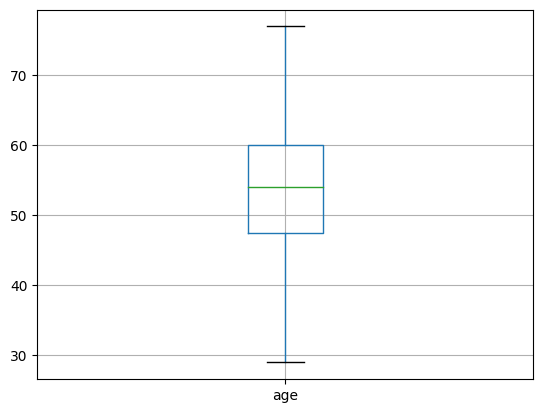

In [ ]:
 df1.boxplot('age')

In [ ]:
df1[['age','oldpeak']].corr()

,age,oldpeak
age,1.000000,0.218461
oldpeak,0.218461,1.000000


<Axes: >

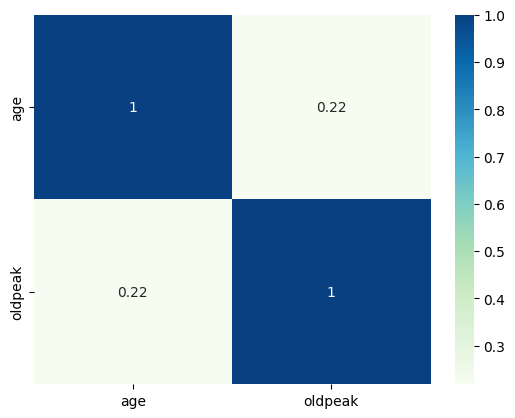

In [ ]:
sns.heatmap(df1[['age','oldpeak']].corr(),annot=True,cmap='GnBu')

<Axes: ylabel='age'>

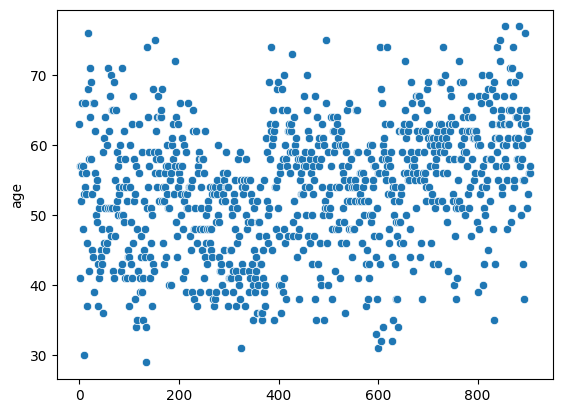

In [ ]:
sns.scatterplot(df1['age'])

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalch'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'num'}>]], dtype=object)

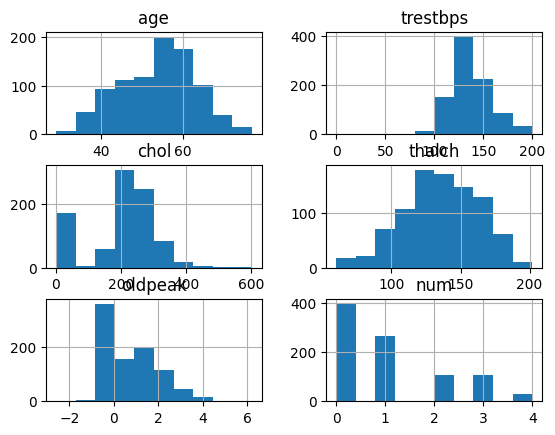

In [ ]:
df1.hist()

In [ ]:
lab_encoder=LabelEncoder()

In [ ]:
df1['fbs']=lab_encoder.fit_transform(df1['fbs'])

<ipython-input-102-0199d1761ab9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['fbs']=lab_encoder.fit_transform(df1['fbs'])


In [ ]:
df1['sex']=lab_encoder.fit_transform(df1['sex'])

<ipython-input-103-bc2899dad6fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sex']=lab_encoder.fit_transform(df1['sex'])


In [ ]:
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,typical angina,145,233,1,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,1,atypical angina,135,203,0,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,1,asymptomatic,140,192,0,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,1,typical angina,118,186,0,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,1,asymptomatic,110,201,0,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,53,1,asymptomatic,125,0,0,normal,120,FALSE,1.5,upsloping,reversable defect,4
903,62,1,asymptomatic,166,170,0,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
904,56,1,non-anginal,170,0,0,lv hypertrophy,123,TRUE,2.5,downsloping,normal,4
905,56,1,non-anginal,144,208,1,st-t abnormality,105,TURE,0.5,downsloping,normal,4


In [ ]:
target=df1['thal']

In [ ]:
target.value_counts()

thal
reversable defect    353
normal               341
fixed defect         213
Name: count, dtype: int64

In [ ]:
target

0           fixed defect
1           fixed defect
2           fixed defect
3           fixed defect
4           fixed defect
             ...        
902    reversable defect
903         fixed defect
904               normal
905               normal
906         fixed defect
Name: thal, Length: 907, dtype: object

In [ ]:
features=df1.drop('thal',axis=1)

In [ ]:
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,63,1,typical angina,145,233,1,lv hypertrophy,150,FALSE,2.3,downsloping,0
1,41,1,atypical angina,135,203,0,normal,132,FALSE,0.0,flat,0
2,57,1,asymptomatic,140,192,0,normal,148,FALSE,0.4,flat,0
3,52,1,typical angina,118,186,0,lv hypertrophy,190,FALSE,0.0,flat,0
4,57,1,asymptomatic,110,201,0,normal,126,TRUE,1.5,flat,0
...,...,...,...,...,...,...,...,...,...,...,...,...
902,53,1,asymptomatic,125,0,0,normal,120,FALSE,1.5,upsloping,4
903,62,1,asymptomatic,166,170,0,st-t abnormality,120,TRUE,3.0,flat,4
904,56,1,non-anginal,170,0,0,lv hypertrophy,123,TRUE,2.5,downsloping,4
905,56,1,non-anginal,144,208,1,st-t abnormality,105,TURE,0.5,downsloping,4


In [ ]:
features=pd.get_dummies(features,dtype='int')

In [ ]:
features

,age,sex,trestbps,chol,fbs,thalch,oldpeak,num,cp_asymptomatic,cp_atypical angina,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_FALSE,exang_TRUE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping
0,63,1,145,233,1,150,2.3,0,0,0,...,1,1,0,0,1,0,0,1,0,0
1,41,1,135,203,0,132,0.0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,57,1,140,192,0,148,0.4,0,1,0,...,0,0,1,0,1,0,0,0,1,0
3,52,1,118,186,0,190,0.0,0,0,0,...,1,1,0,0,1,0,0,0,1,0
4,57,1,110,201,0,126,1.5,0,1,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,53,1,125,0,0,120,1.5,4,1,0,...,0,0,1,0,1,0,0,0,0,1
903,62,1,166,170,0,120,3.0,4,1,0,...,0,0,0,1,0,1,0,0,1,0
904,56,1,170,0,0,123,2.5,4,0,0,...,0,1,0,0,0,1,0,1,0,0
905,56,1,144,208,1,105,0.5,4,0,0,...,0,0,0,1,0,0,1,1,0,0


In [ ]:
features.sex.value_counts()

sex
1    717
0    190
Name: count, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(725, 21)
(725,)
(182, 21)
(182,)


In [ ]:
dec_tree=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=3)

In [ ]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
y_pred=dec_tree.predict(x_test)

In [ ]:
y_pred

array(['normal', 'normal', 'reversable defect', 'reversable defect',
       'fixed defect', 'normal', 'normal', 'reversable defect',
       'reversable defect', 'reversable defect', 'reversable defect',
       'reversable defect', 'normal', 'normal', 'normal', 'normal',
       'normal', 'reversable defect', 'reversable defect', 'normal',
       'normal', 'normal', 'reversable defect', 'normal', 'normal',
       'reversable defect', 'reversable defect', 'fixed defect',
       'fixed defect', 'reversable defect', 'normal', 'reversable defect',
       'normal', 'reversable defect', 'reversable defect',
       'reversable defect', 'reversable defect', 'normal',
       'reversable defect', 'normal', 'normal', 'normal',
       'reversable defect', 'reversable defect', 'reversable defect',
       'reversable defect', 'normal', 'reversable defect', 'normal',
       'reversable defect', 'normal', 'normal', 'reversable defect',
       'reversable defect', 'reversable defect', 'normal', 'fixed de

In [ ]:
accuracy_score(y_test,y_pred)

0.5164835164835165

In [ ]:
# Gridsearchcv method

In [ ]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[1,2,3,4,5]}

In [ ]:
grid_search=GridSearchCV(dec_tree,params,verbose=2)

In [ ]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=2, 

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=2)

In [ ]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}

In [ ]:
dec_tree=DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=4)

In [ ]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, splitter='random')

In [ ]:
y_pred=dec_tree.predict(x_test)

In [ ]:
y_pred

array(['normal', 'normal', 'reversable defect', 'reversable defect',
       'fixed defect', 'normal', 'normal', 'reversable defect',
       'reversable defect', 'reversable defect', 'reversable defect',
       'reversable defect', 'normal', 'normal', 'normal', 'normal',
       'normal', 'reversable defect', 'reversable defect', 'normal',
       'normal', 'normal', 'reversable defect', 'normal', 'normal',
       'reversable defect', 'reversable defect', 'fixed defect',
       'fixed defect', 'reversable defect', 'normal', 'reversable defect',
       'normal', 'reversable defect', 'reversable defect',
       'reversable defect', 'reversable defect', 'normal',
       'reversable defect', 'normal', 'normal', 'normal',
       'reversable defect', 'reversable defect', 'reversable defect',
       'reversable defect', 'normal', 'reversable defect', 'normal',
       'reversable defect', 'normal', 'normal', 'reversable defect',
       'reversable defect', 'reversable defect', 'normal', 'fixed de

In [ ]:
accuracy_score(y_test,y_pred)

0.5164835164835165

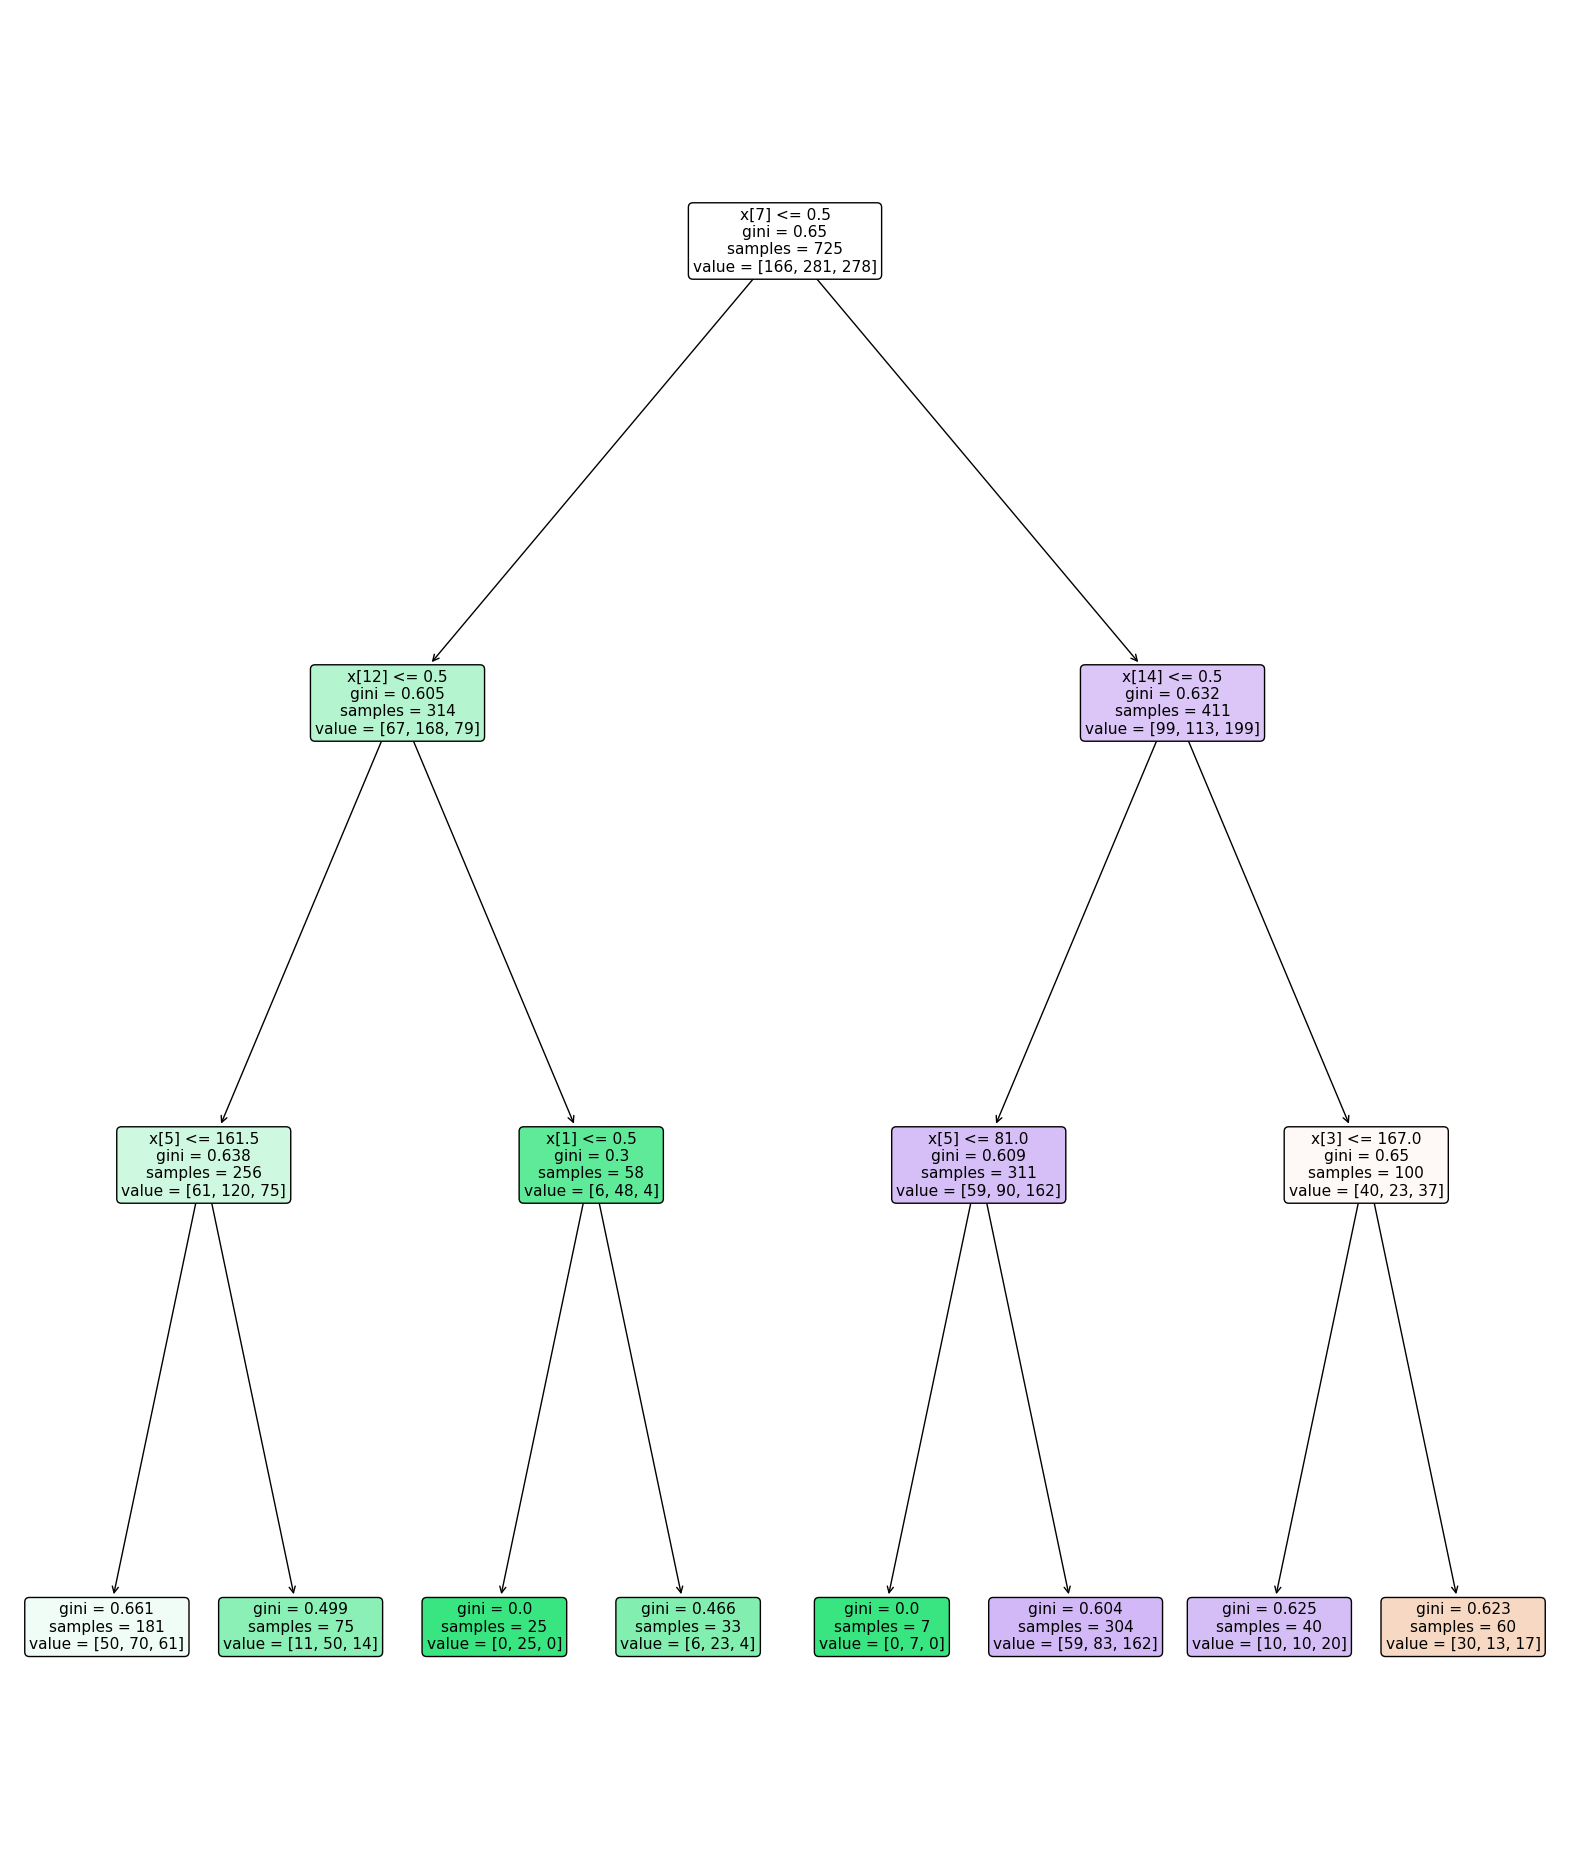

In [ ]:
plt.figure(figsize=(20,24))
plot_tree(dec_tree,max_depth=4,filled='color',rounded=True);

In [ ]:
from sklearn import tree

In [ ]:
print(tree.export_text(dec_tree))

|--- feature_7 <= 0.50
|   |--- feature_12 <= 0.50
|   |   |--- feature_5 <= 161.50
|   |   |   |--- class: normal
|   |   |--- feature_5 >  161.50
|   |   |   |--- class: normal
|   |--- feature_12 >  0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: normal
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: normal
|--- feature_7 >  0.50
|   |--- feature_14 <= 0.50
|   |   |--- feature_5 <= 81.00
|   |   |   |--- class: normal
|   |   |--- feature_5 >  81.00
|   |   |   |--- class: reversable defect
|   |--- feature_14 >  0.50
|   |   |--- feature_3 <= 167.00
|   |   |   |--- class: reversable defect
|   |   |--- feature_3 >  167.00
|   |   |   |--- class: fixed defect



In [ ]:
# Tried eith different criterions ,samples,max_depth,used gridsearch to find the hyperparameters
# In above tree feature7 7 ,12,5 ......itcalculated the entropy value and given the normal
#feature 3 and calculated the entropy value and given it is defect.....

In [ ]:
# checking with Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
grad_boost=GradientBoostingClassifier(n_estimators=80,learning_rate=0.01,max_depth=3,subsample=0.9)

In [ ]:

grad_boost.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=80, subsample=0.9)

In [ ]:
y_pred=grad_boost.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.489010989010989

In [ ]:
# Common hyperparameters of Decision tree:Max_depth,splitter,criterion,min_samples_leaf,max_leaf_nodes
# Max_depth allows to grow tree deeper
#Quality of decision tree measured by the function called criterion(gini(Gini impurity)(gini is default),entropy(inforamation gain))
#Splitter splitting node into many nodes
# Hyperparameters help the model faster,to achieve higher accuracy,to avoid overfitting or underfitting,generalize to new data

# Label Encoding converts the categorical data into numerical data
# One_hot encoding  is the representation of categorical variables as binary vectors
# One_hot encoding increases the dimensionality of the dataset ,label encoding doesn't affect the dimennsionality of the dataset
# One_hot encooding is better for nominal data, label encoding is better for Ordinal data.